This program uses the sklearn librry to perform SGD regression to make a prediciction of a cars MPG given a description of the car.

In [ ]:
import warnings
import seaborn as sns
import random
import requests
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
warnings.filterwarnings("ignore")
url = "https://huggingface.co/datasets/arjund1999/AutoMPG/raw/main/auto-mpg.data"
data = pd.read_table(url, header=None, sep=r'\s{2,}')

In [ ]:
# Creating a data frame w/ headers
df = pd.DataFrame(data)

df.columns = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model_Year", "Car_Name_Old"]
df[['Origin', 'Car_Name']] = df["Car_Name_Old"].str.split("\t", 1, expand = True)
df.drop(columns= ["Car_Name_Old"], axis= 1, inplace=True)

In [ ]:
# Drop duplicate rows
df = df.drop_duplicates()

# Drop rows with "?" values
df = df[~(df == '?').any(axis=1)]

# Dropping Car_Name column since attribute is not suitable or is not correlated with the outcome
df.drop(columns= ["Car_Name"], axis= 1, inplace=True)

# Converting "Origin" feature to numerical value
df["Origin"] = df["Origin"].astype(float)

# Converting "Horsepower" feature to numerical value
df["Horsepower"] = df["Horsepower"].astype(float)




In [ ]:
# Defining features and targets for the model
X = df[["Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model_Year", "Origin"]]
Y = df[["MPG"]]

# Scaling model
s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=10)

# arrays for storing points for plots
alphaplot1 = []
alphaplot2 = []
alphaplot3 = []
alphaplot4 = []

# tuning alpha and iteration values

#loop through iterations for each alpha value
for y in np.linspace(1, 1000, 199):
  model = SGDRegressor(alpha = .0001, max_iter = int(y))
  model.fit(X_train, np.ravel(Y_train))
  y_test_predict = model.predict(X_train)
  alphaplot2.append((int(y),(np.sqrt(mean_squared_error(Y_train, y_test_predict)))))

for y in np.linspace(1, 1000, 199):
  model = SGDRegressor(alpha = .0001, max_iter = int(y))
  model.fit(X_train, np.ravel(Y_train))
  y_test_predict = model.predict(X_test)
  alphaplot1.append((int(y),(np.sqrt(mean_squared_error(Y_test, y_test_predict)))))

for y in np.linspace(1, 1000, 199):
  model = SGDRegressor(alpha = .1, max_iter = int(y))
  model.fit(X_train, np.ravel(Y_train))
  y_test_predict = model.predict(X_train)
  alphaplot4.append((int(y),(np.sqrt(mean_squared_error(Y_train, y_test_predict)))))

for y in np.linspace(1, 1000, 199):
  model = SGDRegressor(alpha = .1, max_iter = int(y))
  model.fit(X_train, np.ravel(Y_train))
  y_test_predict = model.predict(X_test)
  alphaplot3.append((int(y),(np.sqrt(mean_squared_error(Y_test, y_test_predict)))))




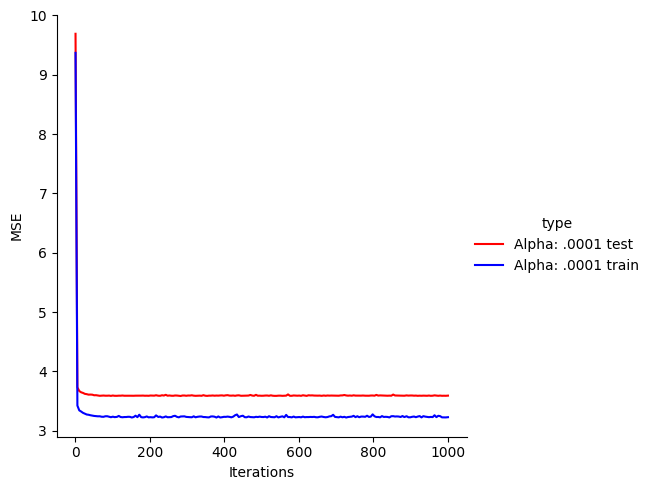

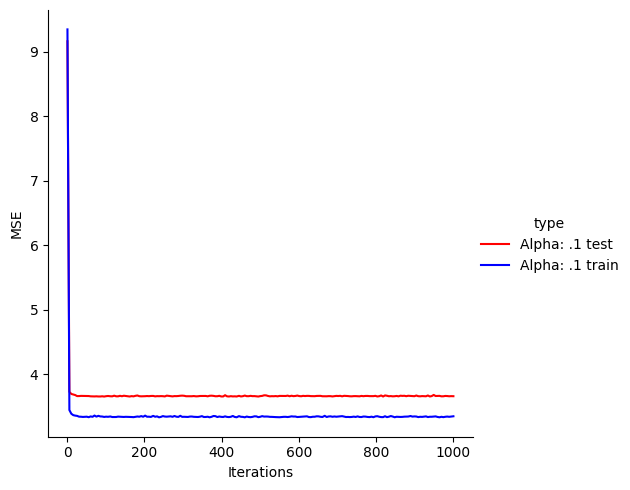

In [ ]:
# adding data to data frame for plotting
alphadf1 = pd.DataFrame.from_records(alphaplot1, columns =['Iterations', 'MSE'])
alphadf1['type'] = 'Alpha: .0001 test'
alphadf2 = pd.DataFrame.from_records(alphaplot2, columns =['Iterations', 'MSE'])
alphadf2['type'] = 'Alpha: .0001 train'
alphadf3 = pd.DataFrame.from_records(alphaplot3, columns =['Iterations', 'MSE'])
alphadf3['type'] = 'Alpha: .1 test'
alphadf4 = pd.DataFrame.from_records(alphaplot4, columns =['Iterations', 'MSE'])
alphadf4['type'] = 'Alpha: .1 train'

alphadf = pd.concat([alphadf1, alphadf2], ignore_index=True)
alphadf5 = pd.concat([alphadf3, alphadf4], ignore_index=True)

# outputing plot for each alpha value
sns.relplot(data=alphadf, x = 'Iterations', y = 'MSE', kind = 'line', hue='type', palette=['red', 'blue'])
sns.relplot(data=alphadf5, x = 'Iterations', y = 'MSE', kind = 'line', hue='type', palette=['red', 'blue'])


In [ ]:
# arrays for storing points for plots
alphaplot1 = []
alphaplot2 = []
alphaplot3 = []
alphaplot4 = []

# tuning alpha values

#loop through iterations for each alpha value
for y in np.linspace(1, 1000, 499):
  model = SGDRegressor(alpha = .001, max_iter = int(y))
  model.fit(X_train, np.ravel(Y_train))
  y_test_predict = model.predict(X_train)
  alphaplot1.append((int(y),(np.sqrt(mean_squared_error(Y_train, y_test_predict)))))

for y in np.linspace(1, 1000, 499):
  model = SGDRegressor(alpha = .001, max_iter = int(y))
  model.fit(X_train, np.ravel(Y_train))
  y_test_predict = model.predict(X_test)
  alphaplot2.append((int(y),(np.sqrt(mean_squared_error(Y_test, y_test_predict)))))

for y in np.linspace(1, 1000, 499):
  model = SGDRegressor(alpha = .01, max_iter = int(y))
  model.fit(X_train, np.ravel(Y_train))
  y_test_predict = model.predict(X_train)
  alphaplot3.append((int(y),(np.sqrt(mean_squared_error(Y_train, y_test_predict)))))

for y in np.linspace(1, 1000, 499):
  model = SGDRegressor(alpha = .01, max_iter = int(y))
  model.fit(X_train, np.ravel(Y_train))
  y_test_predict = model.predict(X_test)
  alphaplot4.append((int(y),(np.sqrt(mean_squared_error(Y_test, y_test_predict)))))

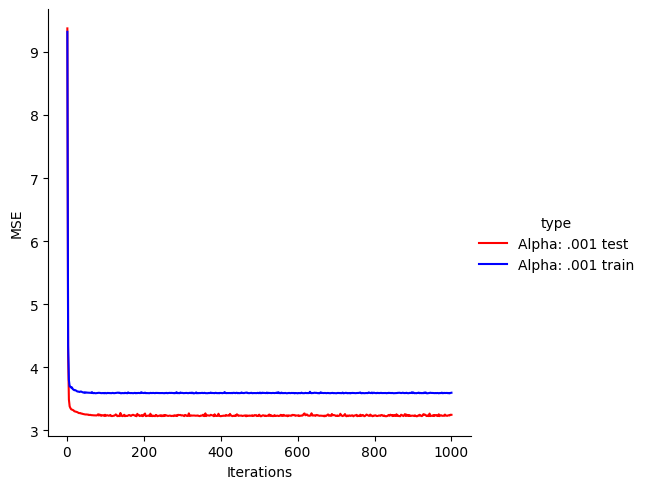

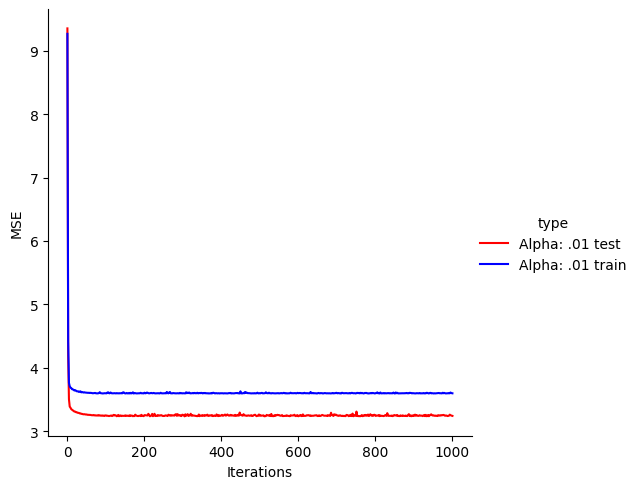

In [ ]:
# adding data to data frame for plotting
alphadf1 = pd.DataFrame.from_records(alphaplot1, columns =['Iterations', 'MSE'])
alphadf1['type'] = 'Alpha: .001 test'
alphadf2 = pd.DataFrame.from_records(alphaplot2, columns =['Iterations', 'MSE'])
alphadf2['type'] = 'Alpha: .001 train'
alphadf3 = pd.DataFrame.from_records(alphaplot3, columns =['Iterations', 'MSE'])
alphadf3['type'] = 'Alpha: .01 test'
alphadf4 = pd.DataFrame.from_records(alphaplot4, columns =['Iterations', 'MSE'])
alphadf4['type'] = 'Alpha: .01 train'

alphadf = pd.concat([alphadf1, alphadf2], ignore_index=True)
alphadf5 = pd.concat([alphadf3, alphadf4], ignore_index=True)

# outputing plot for each alpha value
sns.relplot(data=alphadf, x = 'Iterations', y = 'MSE', kind = 'line', hue='type', palette=['red', 'blue'])
sns.relplot(data=alphadf5, x = 'Iterations', y = 'MSE', kind = 'line', hue='type', palette=['red', 'blue'])


In [ ]:
# running model with best parameters
model = SGDRegressor(alpha = .02, max_iter = 1000)
model.fit(X_train, np.ravel(Y_train))

# model evaluation for training set
y_train_predict = model.predict(X_train)
print(Y_train)
print(y_train_predict)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

      MPG
151  31.0
383  38.0
70   13.0
122  24.0
212  16.5
..    ...
375  36.0
322  46.6
15   22.0
127  19.0
267  27.5

[313 rows x 1 columns]
[28.30330523 35.69728455 10.98415289 23.6840409  14.03215431 14.28873814
 24.30976134 21.39257027 17.74011104 25.91484146 26.24537589 24.54721907
 14.23053387 29.45792593 31.80445929 16.7294953  24.26939503 28.78924645
 13.03880356 20.62500859 26.60484641 31.03754419 26.8813024  26.49282017
 22.43176052 20.60771474 32.89948151 31.97491958 16.03979276 31.73695733
  7.57693456 12.60590768 19.77812071 26.72849113 35.63844036 21.79615542
 17.2803258  22.98181085 20.23832712 11.72991951 27.87257272 22.22927654
 27.34730378 31.17394308 30.16366056 26.30630155 23.27072115 20.67823717
 25.42594503 20.08230642 30.63353036 24.90319457 32.28412931 25.49793985
 17.82405819 31.90145607 27.30935837 30.14309769 28.45407578 30.33032963
 29.04976618 31.72637686 19.45164994 18.20926202 32.72555343 26.57491616
 25.24837123 24.42977435 24.23646552 10.10615501 30.7

In [ ]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Weights are {}'.format(model.coef_))
print('Bias is {}'.format(model.intercept_))
print("\n")



# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Bias is {}'.format(model.intercept_))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 3.2585285135015165
R2 score is 0.8232473188166519
Weights are [-0.77882329  0.63350972 -1.09564766 -3.99449447 -0.23162277  2.60722293
  1.12870598]
Bias is [23.50619076]


The model performance for test set
--------------------------------------
RMSE is 3.604713390844529
R2 score is 0.7882142189609009
Bias is [23.50619076]


